In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score

In [11]:
train = pd.read_excel('lendingclub_traindata.xlsx')
validation=pd.read_excel('lendingclub_valdata.xlsx')
test=pd.read_excel('lendingclub_testdata.xlsx')
# 1 = good, 0 = default
print(train.head())
print("----------------------")
print(validation.head())
print("----------------------")
print(test.head())

   home_ownership    income    dti  fico  loan_status
0               1   44304.0  18.47   690            0
1               0   50000.0  29.62   735            1
2               0   64400.0  16.68   675            1
3               0   38500.0  33.73   660            0
4               1  118000.0  26.66   665            1
----------------------
   homw_ownership    income    dti  fico  loan_status
0               0   25000.0  27.60   660            0
1               0   50000.0  21.51   715            1
2               1  100000.0   8.14   770            1
3               0   75000.0   1.76   685            0
4               1   78000.0  16.11   680            1
----------------------
   home_ownership    income    dti  fico  loan_status
0               1   52400.0  24.64   665            1
1               1  150000.0  17.04   785            1
2               1  100000.0  20.92   710            1
3               0   97000.0  13.11   705            1
4               1  100000.0  24.08  

In [12]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status',axis=1)
X_val=validation.drop('loan_status',axis=1)
X_test=test.drop('loan_status',axis=1)

# store target column
y_train = train['loan_status']
y_val=validation['loan_status']
y_test=test['loan_status']


print(X_train.shape, y_train.shape, X_val.shape,y_val.shape,X_test.shape,y_test.shape)


(7000, 4) (7000,) (3000, 4) (3000,) (2290, 4) (2290,)


In [13]:
X_train.columns 

Index(['home_ownership', 'income', 'dti', 'fico'], dtype='object')

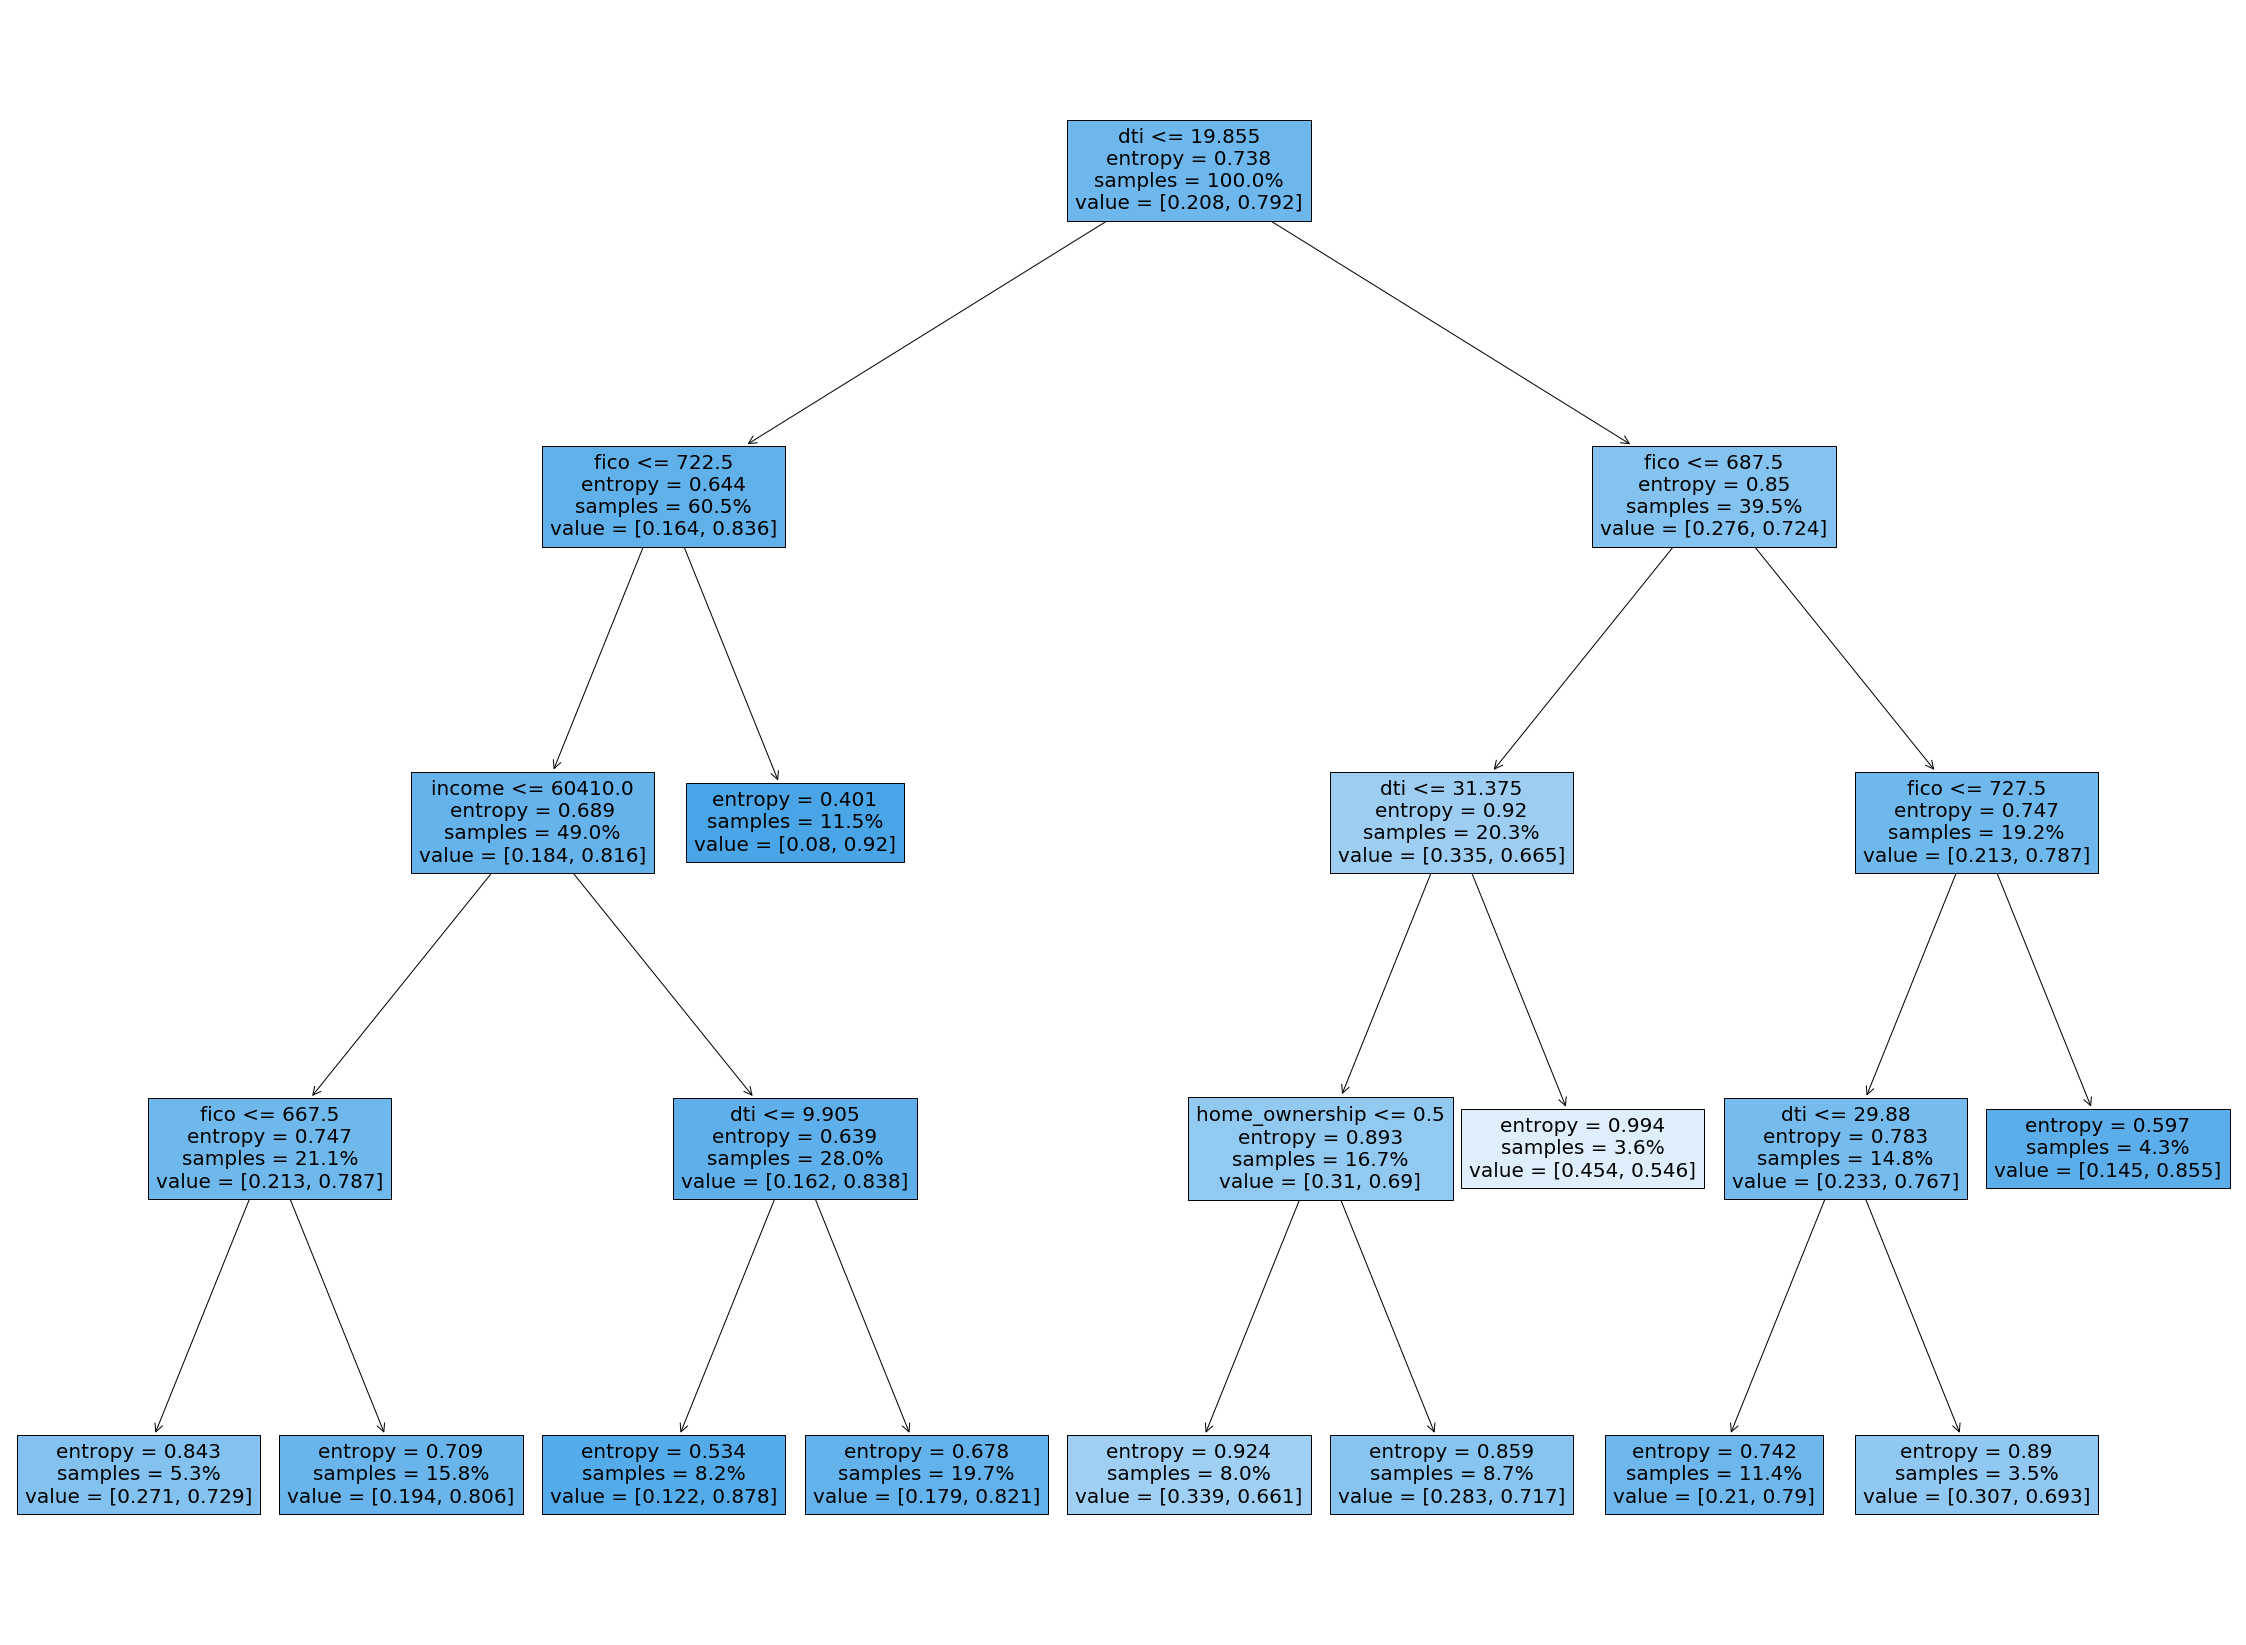

In [14]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=1000,min_samples_leaf=200,random_state=0)
clf = clf.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(clf, filled=True, feature_names=X_train.columns, proportion=True)
plt.show()

In [15]:

y_train_pred = clf.predict_proba(X_train)
y_val_pred=clf.predict_proba(X_val)
y_test_pred=clf.predict_proba(X_test)

print (y_train_pred)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print (y_train_pred)


print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)




[[0.19366516 0.80633484]
 [0.14473684 0.85526316]
 [0.1788559  0.8211441 ]
 ...
 [0.1788559  0.8211441 ]
 [0.30737705 0.69262295]
 [0.19366516 0.80633484]]
[[0.19366516 0.80633484]
 [0.14473684 0.85526316]
 [0.1788559  0.8211441 ]
 ...
 [0.1788559  0.8211441 ]
 [0.30737705 0.69262295]
 [0.19366516 0.80633484]]
cost function training set = 0.48922987922041394
cost function validation set = 0.49018506276665114
cost function test set = 0.490179969222669


In [16]:
THRESHOLD = [.75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
n_test = len(y_test)
Q = clf.predict_proba(X_test)[:,1]

j = 0                                                                                                      
for i in THRESHOLD:                                                                                        # iterate over each threshold        
                                                                         # fit data to model
    preds = np.where(Q>i, 1, 0)                                       # if prob > threshold, predict 1
    
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None)/n_test)*100 
    # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
    j += 1

print('ALL METRICS')
print(results.T.to_string(header=False))

Confusion matrix for threshold = 0.75
[[60.52401747 18.64628821]
 [12.31441048  8.51528384]]
 
Confusion matrix for threshold = 0.8
[[51.48471616 27.68558952]
 [10.13100437 10.69868996]]
 
Confusion matrix for threshold = 0.85
[[22.40174672 56.76855895]
 [ 2.79475983 18.0349345 ]]
 
ALL METRICS
THRESHOLD           0.75       0.8      0.85
accuracy        0.690393  0.621834  0.404367
true pos rate   0.764479  0.650303  0.282956
true neg rate   0.408805  0.513627  0.865828
false pos rate  0.591195  0.486373  0.134172
precision       0.830935  0.835578  0.889081
f-score         0.796323   0.73139  0.429289


In [17]:
# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, Q)
roc_auc = auc(fpr,tpr)

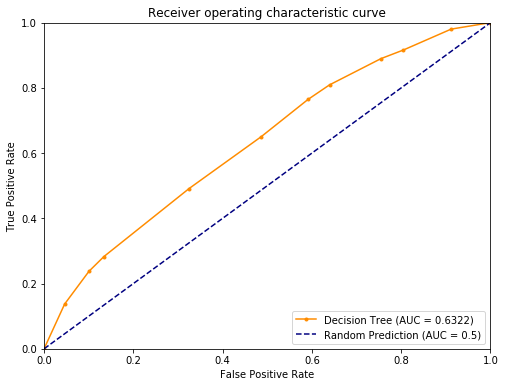

In [18]:
plt.figure(figsize=(8,6))      # format the plot size
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Decision Tree (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()